In [1]:
import matplotlib.pyplot as plt, numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from stellarutil import Simulation, Star
from concurrent.futures import ThreadPoolExecutor

# Step 1: Get the halo at index 0
m10v_res30 = Simulation(simulation_name='m10v_res030md', species=['star', 'dark'])
# Get two halos, one restricted at 100% and 15% of VRIR
halo = m10v_res30.get_halo()

# Get the x,y,z positions of each dm particle in the simulation
# And normalize it with the center of the indicated dark matter halo
dark_x = m10v_res30.particles['dark']['position'][:,0] - halo.xc
dark_y = m10v_res30.particles['dark']['position'][:,1] - halo.yc
dark_z = m10v_res30.particles['dark']['position'][:,2] - halo.zc
# Get the mass of each star in the simulation
dark_m = m10v_res30.particles['dark']['mass']
# Get the distance of each dm from the center of the indicated dark matter halo
dark_distances = np.sqrt(np.square(dark_x) + np.square(dark_y) + np.square(dark_z))

# Get the x,y,z positions of each star particle in the simulation
# And normalize it with the center of the indicated dark matter halo
# star_x = m10v_res30.particles['star']['position'][:,0] - halo.xc
# star_y = m10v_res30.particles['star']['position'][:,1] - halo.yc
# star_z = m10v_res30.particles['star']['position'][:,2] - halo.zc
# # Get the mass of each star in the simulation
# star_m = m10v_res30.particles['star']['mass']
# # Get the distance of each dm from the center of the indicated dark matter halo
# star_distances =  dist(star_x,star_y,star_z) 


# Get the x,y,z positions of each gas particle in the simulation
# And normalize it with the center of the indicated dark matter halo
# gas_x = m10v_res30.particles['gas']['position'][:,0] - halo.xc
# gas_y = m10v_res30.particles['gas']['position'][:,1] - halo.yc
# gas_z = m10v_res30.particles['gas']['position'][:,2] - halo.zc
# # Get the mass of each star in the simulation
# gas_m = m10v_res30.particles['gas']['mass']
# # Get the distance of each dm from the center of the indicated dark matter halo
# gas_distances =  dist(gas_x,gas_y,gas_z) 



../data/m10v_res030md/snapshot_600.z0.000.AHF_halos

# in gizmo_analysis.gizmo_io.Read():
* reading header from:  data/m10v_res030md/output/snapshot_600.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 293563336 particles
    dark2     (id = 2): 9654601 particles
    gas       (id = 0): 293538508 particles
    star      (id = 4): 19944 particles
    blackhole (id = 5): 0 particles


# in utilities.simulation.Snapshot():
* reading:  data/m10v_res030md/snapshot_times.txt

  using snapshot index = 600, redshift = 0.000


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  data/m10v_res030md/output/snapshot_600.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 293563336 particles
    dark2     (id = 2): 9654601 particles
    gas       (id = 0): 293538508 particles
    star      (id = 4): 19944 particles
    blackhole (id = 5): 0 particles

* reading the following
  species: ['star', 'dark']
  star properties:

In [2]:
def get_dm_mass(star: Star):
    # Filter out all dm that are farther than the star's r
    dm_masses = dark_m[dark_distances < star.get_3DR()]
    # dm_masses = filter_list(dark_m, dark_distances, star.get_3DR())
    # dark matter mass is the mass of each particle whose r < r_star
    return np.sum(dm_masses)

def get_star_mass(star: Star):
    # Filter out all dm that are farther than the star's r
    star_masses = star_m[star_distances < star.get_3DR()]
    # dark matter mass is the mass of each particle whose r < r_star
    return np.sum(star_masses)

def get_gas_mass(star: Star):
    # Filter out all dm that are farther than the star's r
    gas_masses = gas_m[gas_distances < star.get_3DR()]
    # dark matter mass is the mass of each particle whose r < r_star
    return np.sum(gas_masses)

def get_close_star_masses(star: Star):
    # Filter out all star masses that are farther than 1 kpc from the stars position
    close_star_masses = 0
    for curStar in stars:
        d = np.sqrt(np.square(star.x - curStar.x) + np.square(star.y - curStar.y) + np.square(star.z - curStar.z))
        if d < 1 and d != 0:
            close_star_masses = close_star_masses + curStar.m
    print(close_star_masses)
    return close_star_masses


stars = halo.stars
count = 0
l = len(stars)

def process(star: Star):
    global count, l
    count = count + 1
    print(f"Done with {count} of {l}")
    dm_mass = get_dm_mass(star)
    # star_mass = get_star_mass(star)
    # gas_mass = get_gas_mass(star)
    # close_mass = get_close_star_masses(star)
    return dm_mass
    # return dm_mass, star_mass, gas_mass, close_mass

# stars = halo.stars[:10]
with ThreadPoolExecutor(max_workers=12) as executor:
    results = list(executor.map(process, stars))

# Get the dark matter masses for the 100% halo
y = []
close_masses = []
for result in enumerate(results, start=1):
    index, data = result
    # sum = data[0] + data[1] + data[2]
    y.append(data)
    # y.append(sum)
    # y.append([data[0], data[1]])
    # close_masses.append(data[3])


Done with 1 of 12494
Done with 2 of 12494
Done with 3 of 12494
Done with 4 of 12494
Done with 5 of 12494
Done with 6 of 12494
Done with 7 of 12494
Done with 8 of 12494
Done with 9 of 12494
Done with 10 of 12494
Done with 11 of 12494
Done with 12 of 12494
Done with 13 of 12494
Done with 14 of 12494
Done with 15 of 12494
Done with 16 of 12494
Done with 17 of 12494
Done with 18 of 12494
Done with 19 of 12494
Done with 20 of 12494
Done with 21 of 12494
Done with 22 of 12494
Done with 23 of 12494
Done with 24 of 12494
Done with 25 of 12494
Done with 26 of 12494
Done with 27 of 12494
Done with 28 of 12494
Done with 29 of 12494
Done with 30 of 12494
Done with 31 of 12494
Done with 32 of 12494
Done with 33 of 12494
Done with 34 of 12494
Done with 35 of 12494
Done with 36 of 12494
Done with 37 of 12494
Done with 38 of 12494
Done with 39 of 12494
Done with 40 of 12494
Done with 41 of 12494
Done with 42 of 12494
Done with 43 of 12494
Done with 44 of 12494
Done with 45 of 12494
Done with 46 of 124

0.1629566609080939 -0.8464738980014772 -0.5701928104190301 -7.385445 0.8864636 1.0335341186364786
0.25030166698434186 -0.16805732861257638 0.1745572458562492 -7.2249837 0.9310074 0.3483739689994861
0.2537096918322277 -0.1785225175681262 0.19350749726663707 12.456385 0.9293594 0.3656282928150712
0.26254229222377035 -0.1718165719685203 0.19581224392368313 -2.0216784 0.919933 0.36985378797513124
-0.1579037750157113 -0.46494913394826654 -0.22838243546311787 -10.931305 0.98901594 0.5415439374155347
-0.14881298082400463 -0.41595034943566134 -0.22454841779426715 -8.140898 0.9800729 0.49556229516709915
-0.18315752759463066 -0.4287918592008282 -0.23262390682839396 -8.563566 0.70145476 0.5210787085072524
-0.17942787094443702 -0.4500397664933189 -0.22319689340702098 -11.382832 0.9889969 0.5334294756793625
-0.17971073857279407 -0.4525012965991664 -0.226187852863859 -12.080698 0.98900443 0.5368559562540669
-0.17681222228793558 -0.45276515724117417 -0.22528672215048573 -11.133232 0.98901105 0.535735

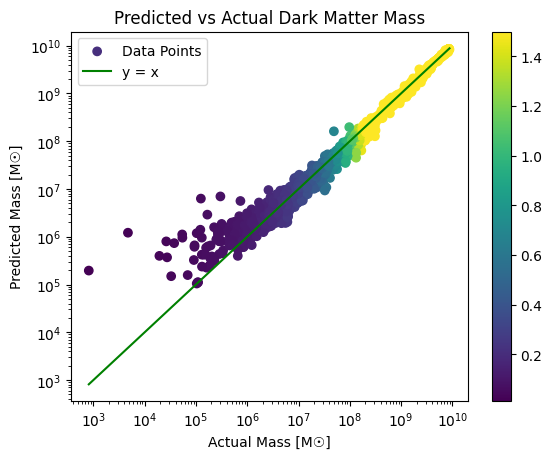

In [17]:
def graph(x,y, title, r):
    x = np.array(x)
    y = np.array(y)
    # Calculate the line of best fit (regression line)
    slope, intercept = np.polyfit(x, y, 1)
    line_of_best_fit = slope * x + intercept
    # Create the scatter plot
    plt.scatter(x, y, label='Data Points', c=r, vmin=0.011, vmax=1.5)
    plt.colorbar()
    # Plot the line of best fit
    # plt.plot(x, line_of_best_fit, color='red', label='Line of Best Fit')
    # Get the max and min value
    minVal = min(min(x), min(y))
    maxVal = max(max(x), max(y))
    print(min(r), max(r))
    # print(r)
    # Plot y=x line
    plt.plot([minVal, maxVal], [minVal, maxVal], color='green', label='y = x')
    # Set x and y limits to be normalized
    # plt.xlim(minVal, maxVal)
    # plt.ylim(minVal, maxVal)
    # Add labels and legend
    plt.xlabel('Actual Mass [M☉]')
    plt.ylabel('Predicted Mass [M☉]')
    plt.title(title)
    plt.legend()
    plt.loglog()
    # Show the plot
    plt.show()

# Step 2: Prepare the data for training
X = []
index = 0
for star in stars:
    X.append([star.x, star.y, star.vz, star.a, star.get_3DR(), star.get_3DR()])
    print(star.x, star.y, star.z, star.vz, star.a, star.get_3DR())
    # X.append([star.x, star.y, star.vz, star.a, star.get_3DR(), close_masses[index]])
    index = index + 1
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Step 4: Initialize and train the KNN regressor
y_train = np.array(y_train)
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)
# Step 5: Predict on the test data
y_pred = knn_regressor.predict(X_test)
X_test = np.array(X_test)

y_pred = np.array(y_pred)
y_test = np.array(y_test)


# Find the percent difference
sum = 0
list = []
for i in range(len(y_pred)):
    a = y_pred[i]
    b = y_test[i]
    r = round(X_test[i][4],3)
    p = round(100 * ((2 * abs(a-b)) / (a+b)), 3)
    sum = sum + p
    list.append((r, p))

print(f"Average Percent Difference: { round(sum / len(list), 3) }%")
print(f"Average Accuracy: { round(100 - sum / len(list), 3) }%")

# Sort the list based on r
sorted_list = sorted(list, key=lambda x: x[0])
# Print the sorted list
if False:
    for i in range(len(sorted_list)):
        print(f"Percent Difference at r = {sorted_list[i][0]} is {sorted_list[i][1]}%")





# Find the percent difference for r > threshold
# min r = 0.0111, max r = 53.8378
threshold = 5.38378
sumOver = 0
sumUnder = 0
listOver = []
listUnder = []
for i in range(len(y_pred)):
    a = y_pred[i]
    b = y_test[i]
    r = round(X_test[i][4],3)
    if r > threshold:
        p = round(100 * ((2 * abs(a-b)) / (a+b)), 3)
        sumOver = sumOver + p
        listOver.append((r, p))
    else:
        p = round(100 * ((2 * abs(a-b)) / (a+b)), 3)
        sumUnder = sumUnder + p
        listUnder.append((r, p))

print(f"Average Percent Difference for r > {threshold}: { round(sumOver / len(listOver), 3) }%")
print(f"Average Accuracy for r > {threshold}: { round(100 - sumOver / len(listOver),3) }%")
print(f"Average Accuracy for r <= {threshold}: { round(100 - sumUnder / len(listUnder),3) }%")

# Sort the list based on r
sorted_list = sorted(list, key=lambda x: x[0])
# Print the sorted list
if False:
    for i in range(len(sorted_list)):
        print(f"Percent Difference at r = {sorted_list[i][0]} is {sorted_list[i][1]}%")


# Step 6 - Graph
graph(y_test, y_pred, "Predicted vs Actual Dark Matter Mass", X_test[:,4])
# graph(y_test[:,0], y_pred[:,0], "Predicted vs Actual Dark matter mass", X_test[:,4])
# graph(y_test[:,1], y_pred[:,1], "Predicted vs Actual Stellar mass", X_test[:,4])

In [4]:
from stellarutil import Simulation
m10v_res30 = Simulation('m10v_res250md')
m10v_res30.help()



../data/m10v_res250md/snapshot_600.z0.000.AHF_halos

# in gizmo_analysis.gizmo_io.Read():
* reading header from:  data/m10v_res250md/output/snapshot_600.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 36851064 particles
    dark2     (id = 2): 13328409 particles
    gas       (id = 0): 36840830 particles
    star      (id = 4): 10234 particles
    blackhole (id = 5): 0 particles


# in utilities.simulation.Snapshot():
* reading:  data/m10v_res250md/snapshot_times.txt

  using snapshot index = 600, redshift = 0.000


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  data/m10v_res250md/output/snapshot_600.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 36851064 particles
    dark2     (id = 2): 13328409 particles
    gas       (id = 0): 36840830 particles
    star      (id = 4): 10234 particles
    blackhole (id = 5): 0 particles

* reading the following
  species: ['star']
  star properties: ['form.sc